In [3]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [5]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [7]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [12]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [15]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [16]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [17]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [18]:
X[2,[2,0,1]]

array([10,  8,  9])

In [19]:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [20]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [22]:
mean = [0,0]
cov = [[1,2],[2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

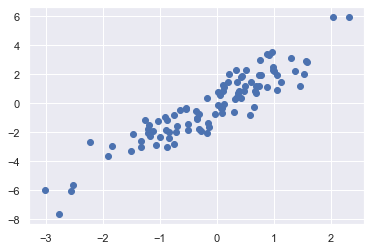

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1]);

In [25]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([20, 32, 13,  0, 19, 39, 30,  4, 51, 76, 44, 22, 15, 75, 93, 24, 28,
       63, 97,  7])

In [27]:
selection = X[indices]
selection.shape

(20, 2)

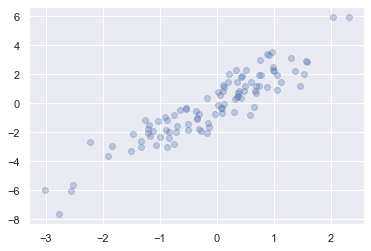

In [28]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',s=200)

In [30]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [31]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [34]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [36]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [37]:
np.random.seed(42)
x = np.random.rand(100)

In [43]:
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
i = np.searchsorted(bins,x)
np.add.at(counts,i,1)

ValueError: 'steps' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

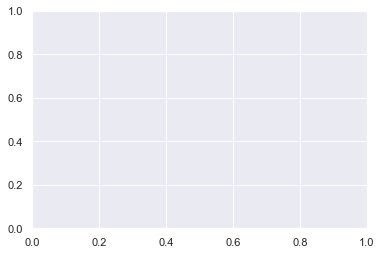

In [49]:
plt.plot(bins,counts,linestyle='steps');

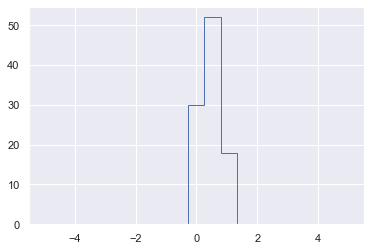

In [50]:
plt.hist(x,bins,histtype='step');

In [53]:
print("Numpy routine:")
%timeit counts,edges = np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

Numpy routine:
58.9 µs ± 387 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
33.1 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [57]:
x = np.random.randn(1000000)
print("Numpy routine:")
%timeit counts, edgs = np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

Numpy routine:
151 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:


IndexError: index 20 is out of bounds for axis 0 with size 20

In [58]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])